In [1]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from matplotlib import cm
import os

from plotters import *

######## Set the environment variable in the Python environment (if haven't done already) ########
# os.environ['RL_CMAES_ROOT'] = '/Users/adamboesky/Research/RL_CMAES'

path = os.environ['RL_CMAES_ROOT']

# Optimization Results

In [11]:
policy_df = pd.DataFrame(
    {
        'trajectory': [],
        'gamma': [],
        'alpha': [],
        'r': [],
        's': [],
        'd': [],
        'min_loss': [],
    }
)

policy_params_path = os.path.join(path, 'bounded_params')
for filename in os.listdir(policy_params_path):
    file_path = os.path.join(policy_params_path, filename)

    new_row = pd.read_csv(file_path)
    new_row['trajectory'] = filename.split('.')[0]

    policy_df = pd.concat((policy_df, new_row), ignore_index=True)

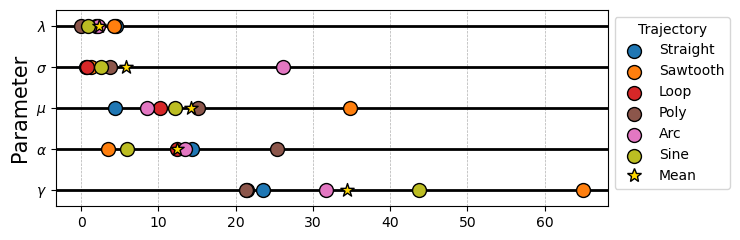

In [18]:
# Define the attributes and corresponding colors
attributes = [policy_df['gamma'], policy_df['alpha'], policy_df['r'], policy_df['s'], policy_df['d']]
trajectories = policy_df['trajectory']
labels = ["$\gamma$", "$\\alpha$", "$\mu$", "$\sigma$", "$\lambda$"]

# Assign a unique color for each trajectory
colormap = cm.tab10  # A modern, visually distinct colormap
trajectory_colors = {traj: colormap(i / len(policy_df['trajectory'])) for i, traj in enumerate(policy_df['trajectory'])}

# Create the plot
fig, ax = plt.subplots(figsize=(7.5, 2.5))

for i, (attribute, label) in enumerate(zip(attributes, labels)):
    y = [i + 1] * len(attribute)  # Offset each number line on the y-axis
    for traj, val, y_pos in zip(trajectories, attribute, y):
        color = trajectory_colors[traj]
        ax.scatter(val, y_pos, label=traj[:-5].capitalize() if i == 0 else "", color=color, edgecolor='black', s=100, zorder=3)
    
    # Plot the mean value with a star marker
    mean_val = attribute.mean()
    ax.scatter(mean_val, i + 1, color='gold', edgecolor='black', s=100, marker='*', zorder=4)

# Add labels, legend, and grid
ax.set_yticks(range(1, len(labels) + 1))
ax.set_yticklabels(labels)
ax.set_ylabel("Parameter", fontsize=15)

# Create custom legend handles
handles, _ = ax.get_legend_handles_labels()
mean_handle = Line2D([0], [0], marker='*', color='w', markerfacecolor='gold', markeredgecolor='black', markersize=10, label='Mean')
handles.append(mean_handle)

ax.legend(handles=handles, loc="upper left", bbox_to_anchor=(1, 1), title="Trajectory")
ax.grid(True, which="both", linestyle="--", linewidth=0.5, zorder=-1)
ax.yaxis.grid(True, zorder=1, lw=2, color='k', ls='-')

lims = ax.get_ylim()
ax.set_ylim((lims[0] - 0.2, lims[1] + 0.2))

plt.tight_layout()
plt.show()

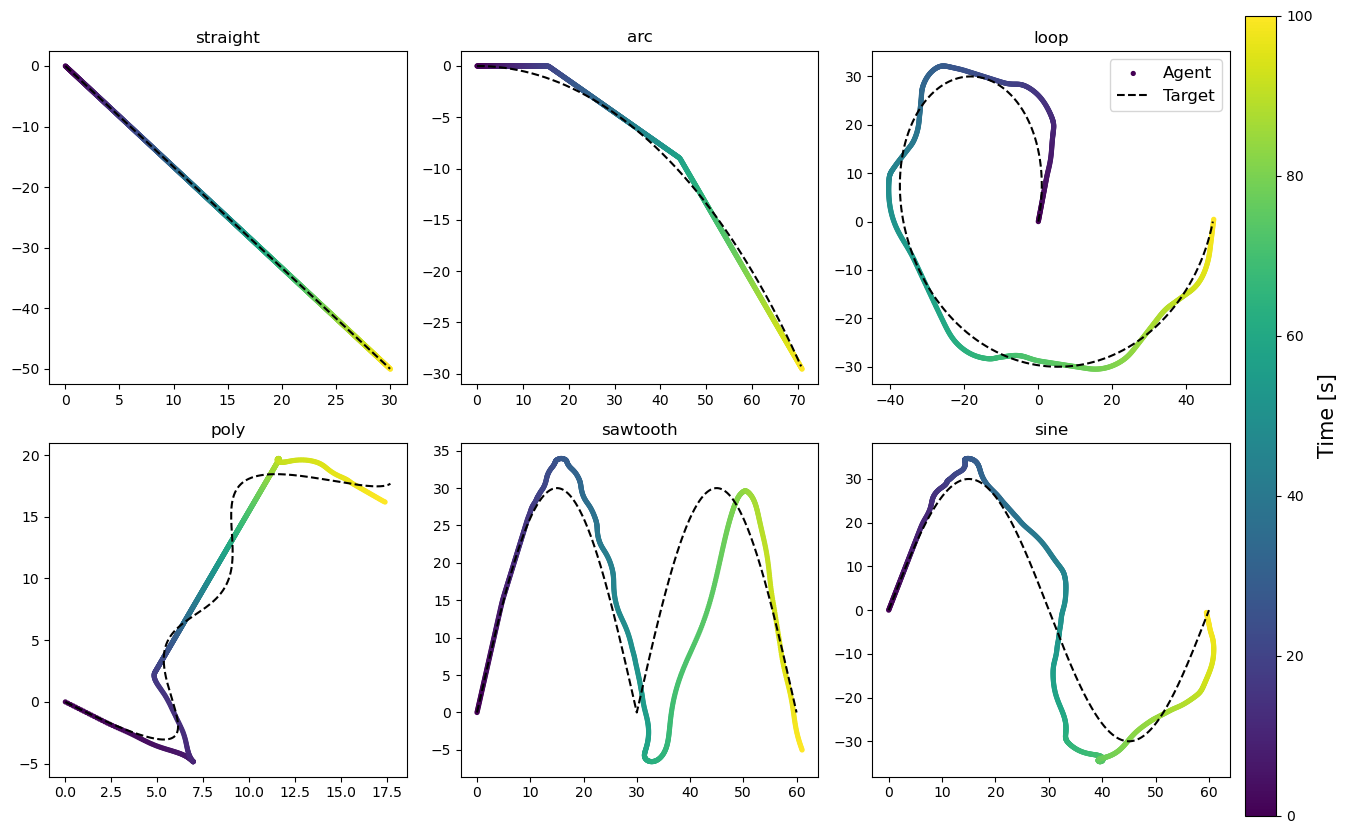

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(12.5, 8))

traj_names = ['straight', 'arc', 'loop', 'poly', 'sawtooth', 'sine']
for i, ax in enumerate(axes.flatten()):
    ax = plot_results_with_params(traj_names[i], ax=ax)
    ax.grid(False)
    ax.collections[0].colorbar.remove()
    ax.set_title(traj_names[i])

    if i != 2:
        ax.legend().remove()
    else:
        ax.legend(fontsize=12)

plt.tight_layout()
cbar_ax = fig.add_axes([1.0, 0.0, 0.025, 1.0])
norm = plt.Normalize(vmin=0, vmax=100)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Time [s]', fontsize=15)

plt.show()

In [20]:
# generate all the animations
traj_names = ['straight', 'arc', 'loop', 'poly', 'sawtooth', 'sine']
for tname in traj_names:
    generate_animation_with_params(tname)

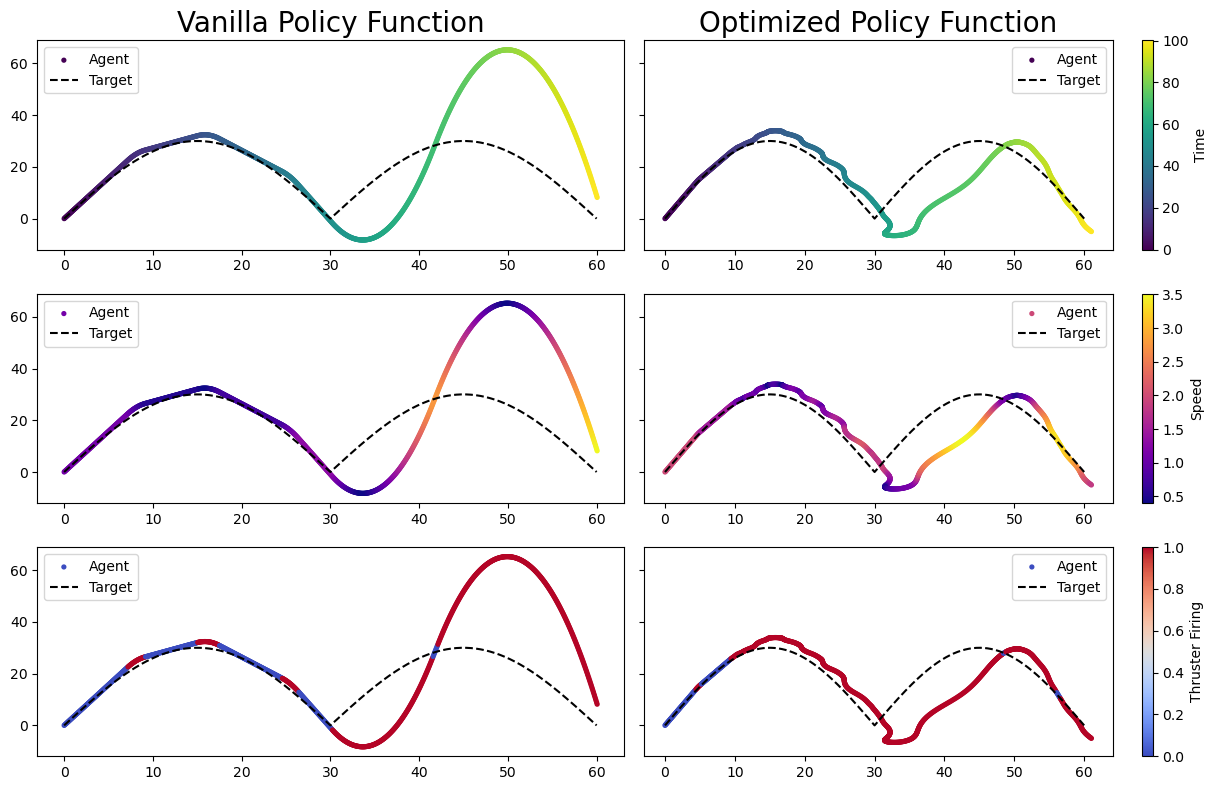

In [14]:
fig, axes = plt.subplots(3, 2, figsize=(12.5, 8),sharey=True)

traj_names = ['sawtooth']
colorings_map = {
    0:'time',
    1:'time',
    2:'speed',
    3:'speed',
    4:'firing',
    5:'firing'
}

axes = axes.flatten()

for i, ax in enumerate(axes):

    ax = plot_results_with_params(traj_names[0], ax=ax, vanilla=(not i % 2), coloring=colorings_map[i])
    ax.grid(False)
    if i % 2 == 0:
        ax.collections[0].colorbar.remove()


axes[0].set_title("Vanilla Policy Function", fontsize=20)
axes[1].set_title("Optimized Policy Function", fontsize=20)
plt.tight_layout()
plt.show()

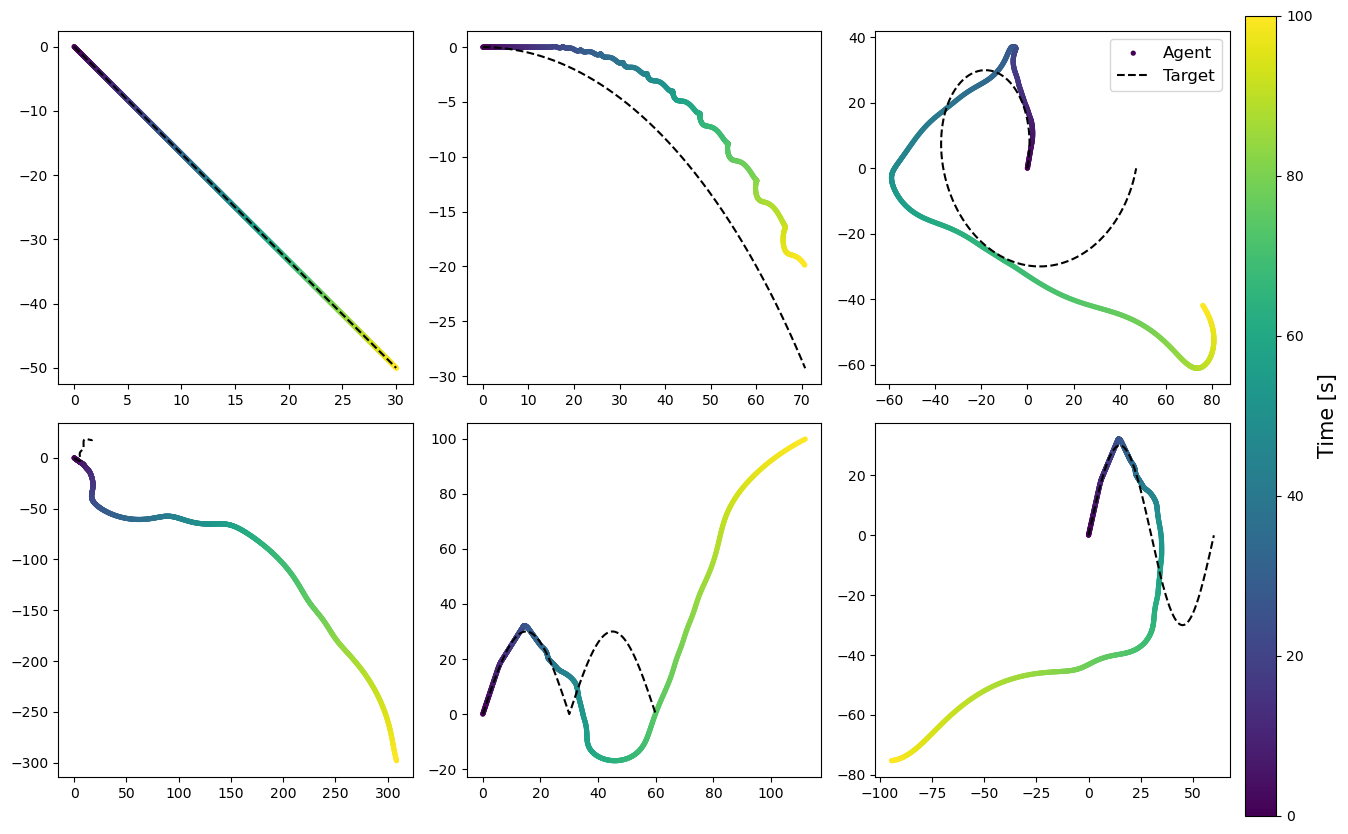

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(12.5, 8))

traj_names = ['straight', 'arc', 'loop', 'poly', 'sawtooth', 'sine']
for i, ax in enumerate(axes.flatten()):
    ax = plot_results_with_avg_params(traj_names[i], ax=ax, coloring="time")
    ax.grid(False)
    ax.collections[0].colorbar.remove()

    if i != 2:
        ax.legend().remove()
    else:
        ax.legend(fontsize=12)

plt.tight_layout()
cbar_ax = fig.add_axes([1.0, 0.0, 0.025, 1.0])
norm = plt.Normalize(vmin=0, vmax=100)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Time [s]', fontsize=15)

plt.show()


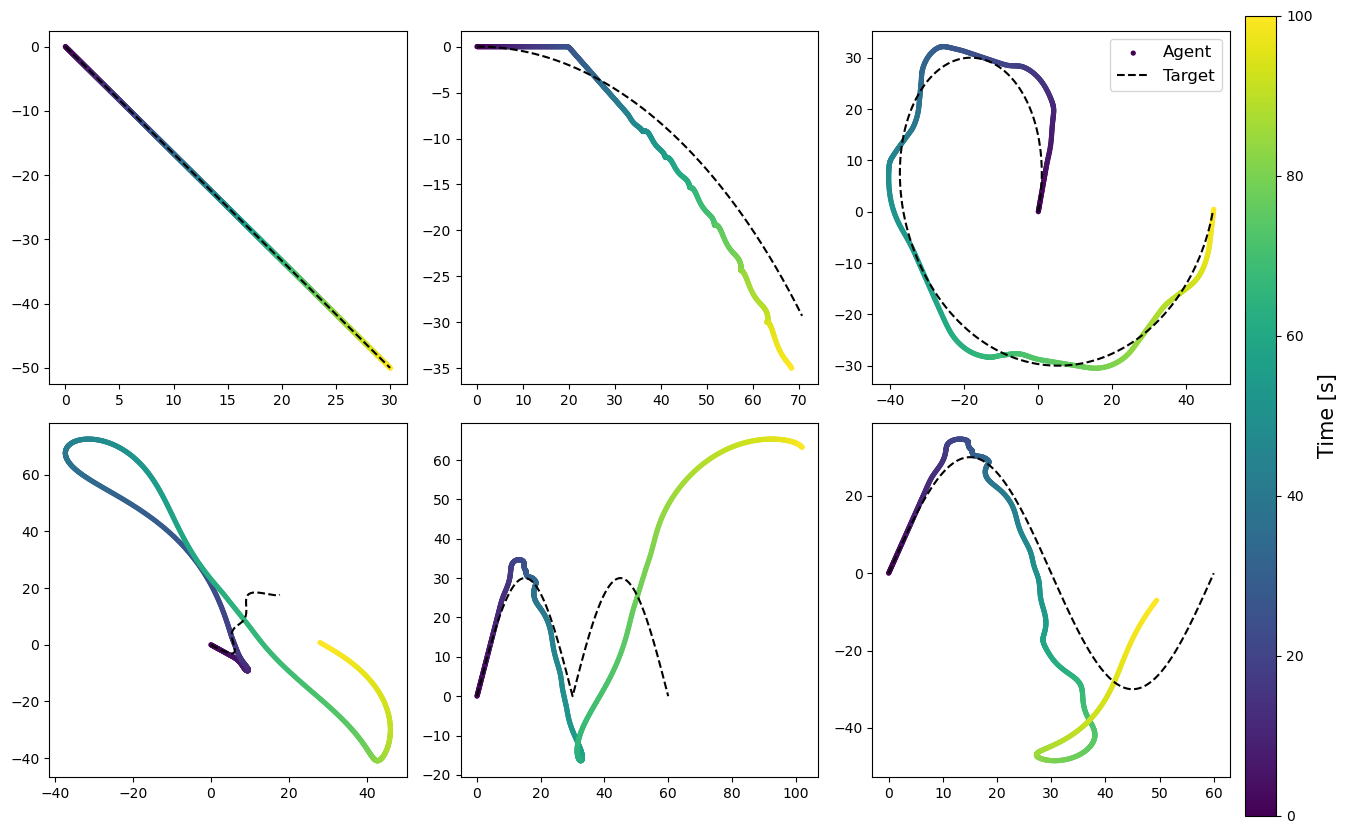

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(12.5, 8))

traj_names = ['straight', 'arc', 'loop', 'poly', 'sawtooth', 'sine']
for i, ax in enumerate(axes.flatten()):
    ax = plot_using_weights_from_x_on_traj_y("loop", traj_names[i], ax=ax, coloring="time")
    ax.grid(False)
    ax.collections[0].colorbar.remove()

    if i != 2:
        ax.legend().remove()
    else:
        ax.legend(fontsize=12)

plt.tight_layout()
cbar_ax = fig.add_axes([1.0, 0.0, 0.025, 1.0])
norm = plt.Normalize(vmin=0, vmax=100)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Time [s]', fontsize=15)

plt.show()

In [19]:
generate_animation_with_params("loop")

<Axes: >

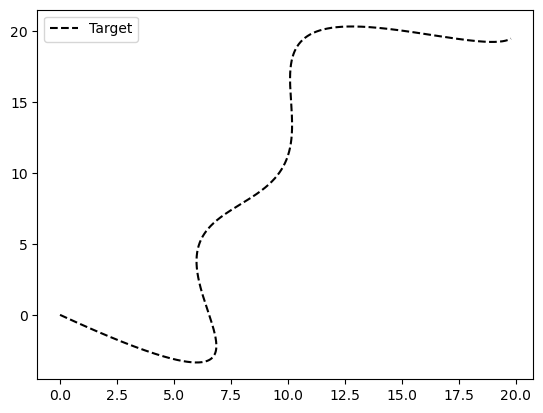

In [13]:
plot_trajectory(path + "/trajectories/poly.csv")